# **Usando Machine Learning KNN (K-Nearest Neighbors) para resolver problemas**

O objetivo principal deste artigo é demonstrar as melhores práticas de resolução de um problema por meio do algoritmo de aprendizado de máquina superado **KNN** (K-Nearest Neighbors).

Para cumprir este objetivo é utilizado o conjunto de dados **IRIS**, um conjunto de dados muito comum para cientistas de dados para testes e estudos em **ML** (Machine Learning). Além disso, este é um conjunto de dados integrado para a biblioteca ***Scikit-Learn*** ou ***Seaborn***.

> # **Conjunto de dados iris**
* Iris é um gênero de espécies de plantas com flores vistosas.
* As espécies de íris aqui estudadas, **setosa**, **versicolor** e **virginica** compartilham uma cor semelhante: violeta escuro/azul.
* Uma forma de distinguir visualmente as espécies entre elas é por meio das dimensões de suas pétalas e sépalas (comprimento e largura).

> **A primeira etapa é importar a biblioteca _Seaborn_ e, em seguida, carregar o conjunto de dados iris a partir dela.**

Diferentemente do Scikit-Learn, que carrega o dataset como arrays, o Seaborn carrega como Dataframe do Pandas, economizando algumas etapas para construir o dataframe.

In [1]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Importa a biblioteca seaborn, uma biblioteca de visualização de dados baseada
    no matplotlib.
- Carrega o dataset iris em memória
"""
import seaborn as sns
iris = sns.load_dataset("iris")

In [2]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Mostra o tipo do dado do dataset, no caso é um DataFrame do pandas
"""
type(iris)

pandas.core.frame.DataFrame

O método **sample** de um Dataframe do Pandas é uma ótima maneira de visualizar como os dados são armazenados, tais como recursos e tipos de dados, a partir de amostras aleatórias do Dataframe, não ordenadas.

In [3]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Mostra 5 exemplos aleatórios do dataset iris.
"""
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
89,5.5,2.5,4.0,1.3,versicolor
103,6.3,2.9,5.6,1.8,virginica
145,6.7,3.0,5.2,2.3,virginica
65,6.7,3.1,4.4,1.4,versicolor
119,6.0,2.2,5.0,1.5,virginica


Existem 4 características (atributos) listadas: "comprimento da sépala (cm)", "largura da sépala (cm)", "comprimento da pétala (cm)" e "largura da pétala (cm)", respectivamente.

Para entender melhor o conjunto de dados, observe a imagem abaixo.
> **Este método é específico para o Colab importar arquivos, neste caso uma imagem.**

In [ ]:
from google.colab import files
iris_image = files.upload()

Saving output.png to output.png


In [ ]:
from IPython.display import Image
Image(filename ="iris-data-set.png", width=500, height=350)

FileNotFoundError: ignored

> **Para realizar algumas verificações extras no Dataframe, precisamos importar a biblioteca Pandas.**

Antes de iniciar qualquer trabalho mais aprofundado sobre qualquer dataset, é essencial fazer uma análise preliminar dos dados: os tipos de dados, os seus tamanhos, alguns valores estatísticos, valores faltantes, etc. Em seguida, tire suas primeiras conclusões e corrija qualquer problema* da maneira adequada.

*não é o deste dataset, mas as verificações devem ser realizadas de qualquer maneira.

In [4]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Import a lib pandas;
"""
import pandas as pd

In [5]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Chama o método value_counts que retornará a contagem de objetos únicos
    passados por parâmetro.
"""
pd.value_counts(iris.species)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

O dataset é composto de 150 flores (exemplos), 50 de cada espécie (classe).

> **As características estatísticas básicas das colunas numéricas.**

Por meio do método **describe**, é possível visualizar a média, o desvio padrão, máximo e mínimo, e os percentis para cada um dos recursos.

In [ ]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Chama o método describe no dataset iris, que exibe informações descritivas
    por coluna do dataset, como count, média, desvio padrão, mínimo, máximo e
    percentis.
"""
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Está bem claro que cada atributo contrasta com os outros. Porém, neste caso, todos os cálculos consideram os exemplos das 3 classes juntos. A utilização de gráficos seria mais adequada para uma análise exploratória.

O método **info** fornece informações extras sobre o dataframe e o tipo de dados para cada coluna:
* os atributos são do tipo float64
* o alvo, classe ou espécie, do tipo objeto

In [ ]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Exibe mais informações sobre o dataset através de info, é possível verificar
    o tipo dos dados no dataset, quantos valores as colunas possuem,  se há
    valores não-nulos (olhando RangeIndex e quantia de valores não-nulos).
"""
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


O método **isnull** combinado com o método **sum** retorna se há algum valor nulo no dataframe que deva ser gerenciado, caso contrário, pode implicar na impossibilidade de aplicar qualquer algoritmo de aprendizado de máquina.

In [ ]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Verifica se há valores nulos, realizando a soma no is_null
    que valida se os valores no DataFrame são nulos. Como o resultado
    é zero, não há valores nulos.
"""
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

> # **Análise Exploratória por Gráficos**

**Seaborn** é uma biblioteca de visualização de dados Python baseada em **Matplotlib**. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.


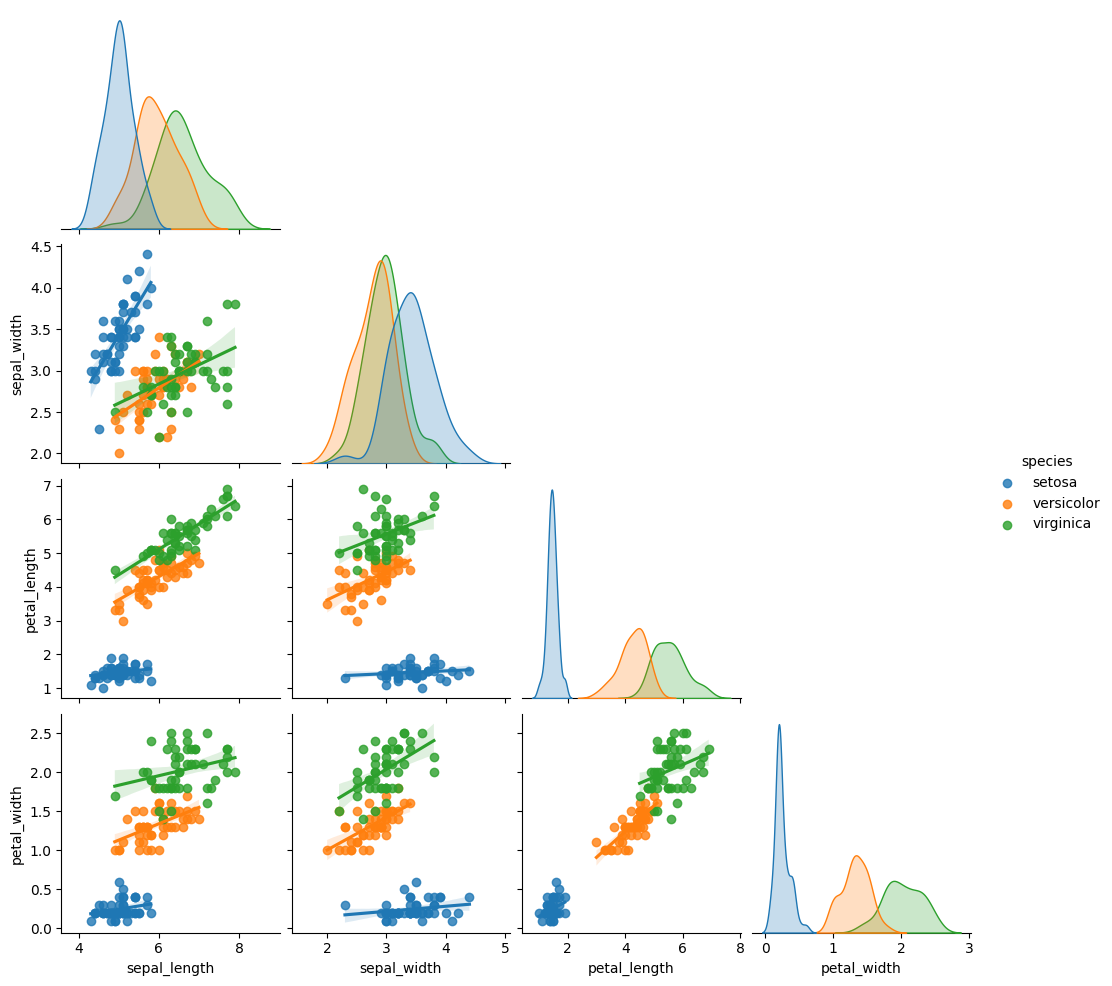

In [6]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Chama o pairplot do Seaborn que plota gráficos mostrando a relação das variáveis
    aos pares do dataset;
    - Gráficos de distribuição dos dados são impressos como histogramas;
    - Gráficos de reçãoa das variáveis com outra variável são impressos
        como scatter plot;

É uma visualização bastante útil para analisar o dataset, é fácil perceber
    como a espécie setosa possui um agrupamento muito bem definido na relação
    petal_length e petal_width.
"""
sns.pairplot(iris, hue="species", corner=True, kind='reg')

> ## **Identificação Setosa**

**Iris-setosa**, **iris-virginica** e **iris-versicolor** têm a mesma cor (violeta/azul). Uma forma de distinguir as espécies é analisando suas dimensões de pétalas e sépalas e as proporções destas. Juntamente com uma análise exploratória dos dados é possível obter informações valiosas e algumas conclusões. Segue.

Como visto nos gráficos acima, os dados de **iris-setosa** são bem distintos das outras duas espécies. Com uma distribuição de dados como essa, espera-se de qualquer bom algoritmo preditivo de aprendizado de máquina uma alta acurácia, talvez 100%. Ou melhor, para a classificação desta espécie em relação às outras duas, **basta verificar as dimensões das pétalas**; se seu comprimento for de até 2 cm ou sua largura for de até 0,7 cm, com certeza é íris-setosa.


In [7]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Realiza interpolação na string com resultado de algus métodos em cima do df.

É útil para extrair o valor máximo dado uma classse, ou mínimo dado
duas classes como no exemplo. Uma boa forma de extrair conclusões do dataset
de forma programática e fácil para humanos lerem.
"""
print('Para a flor Setosa, valor máximo de comprimento da pétala nesse dataset é', iris.loc[iris.species=='setosa'].max().petal_length, 'cm, enquanto que para as outras espécies o valor mínimo é', iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')].min().petal_length, 'cm.\nQuanto à largura da pétala, o valor máximo para a Setosa é', iris.loc[iris.species=='setosa'].max().petal_width, 'cm, e para as outras espécies o valor mínimo é', iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')].min().petal_width, 'cm.')

Para a flor Setosa, valor máximo de comprimento da pétala nesse dataset é 1.9 cm, enquanto que para as outras espécies o valor mínimo é 3.0 cm.
Quanto à largura da pétala, o valor máximo para a Setosa é 0.6 cm, e para as outras espécies o valor mínimo é 1.0 cm.


In [8]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Calcula os valores mínimo e máximo das colunas 'petal_length' e 'petal_width'
    para cada classe do dataset e exibe esses resultados em duas tabelas
    pivot separadas.
"""
from IPython.display import display
p_l = pd.pivot_table(iris, values=['petal_length'], index=['species'],aggfunc=[min,max], margins=False)
p_w = pd.pivot_table(iris, values=['petal_width'], index=['species'],aggfunc=[min,max], margins=False)
P_L = pd.DataFrame(p_l.to_records())
P_W = pd.DataFrame(p_w.to_records())
display(P_L),display(P_W)


,species,"('min', 'petal_length')","('max', 'petal_length')"
0,setosa,1.0,1.9
1,versicolor,3.0,5.1
2,virginica,4.5,6.9


,species,"('min', 'petal_width')","('max', 'petal_width')"
0,setosa,0.1,0.6
1,versicolor,1.0,1.8
2,virginica,1.4,2.5


(None, None)

> ## **Identificação de Virgínia e Versicolor**

Para as outras duas espécies. Os dados de **iris-versicolor** e **iris-virginica**, ao mesmo tempo que são próximos, é notório um claro valor normal para todas as suas dimensões, exceto para a largura da sépala que é quase a mesma para ambas as espécies. Devido a isso, é possível distinguir com uma alta porcentagem de precisão quando se refere às seguintes relações:

* Comprimento da pétala **vs** Comprimento da sépala ou largura da sépala
* Largura da pétala **vs** Largura da sépala ou Largura da sépala ou Comprimento da pétala

A única relação que é quase a mesma, e não poderia, por meio de uma análise exploratória, distinguir as duas espécies, já que as dimensões e a proporção entre comprimento e largura são praticamente as mesmas é:

* Comprimento da Sépala **vs** Largura da Sépala

Um algoritmo de Machine Learning é de grande utilidade para essa classificação, reduzindo qualquer erro humano ao comparar todas essas dimensões e relacionamentos.



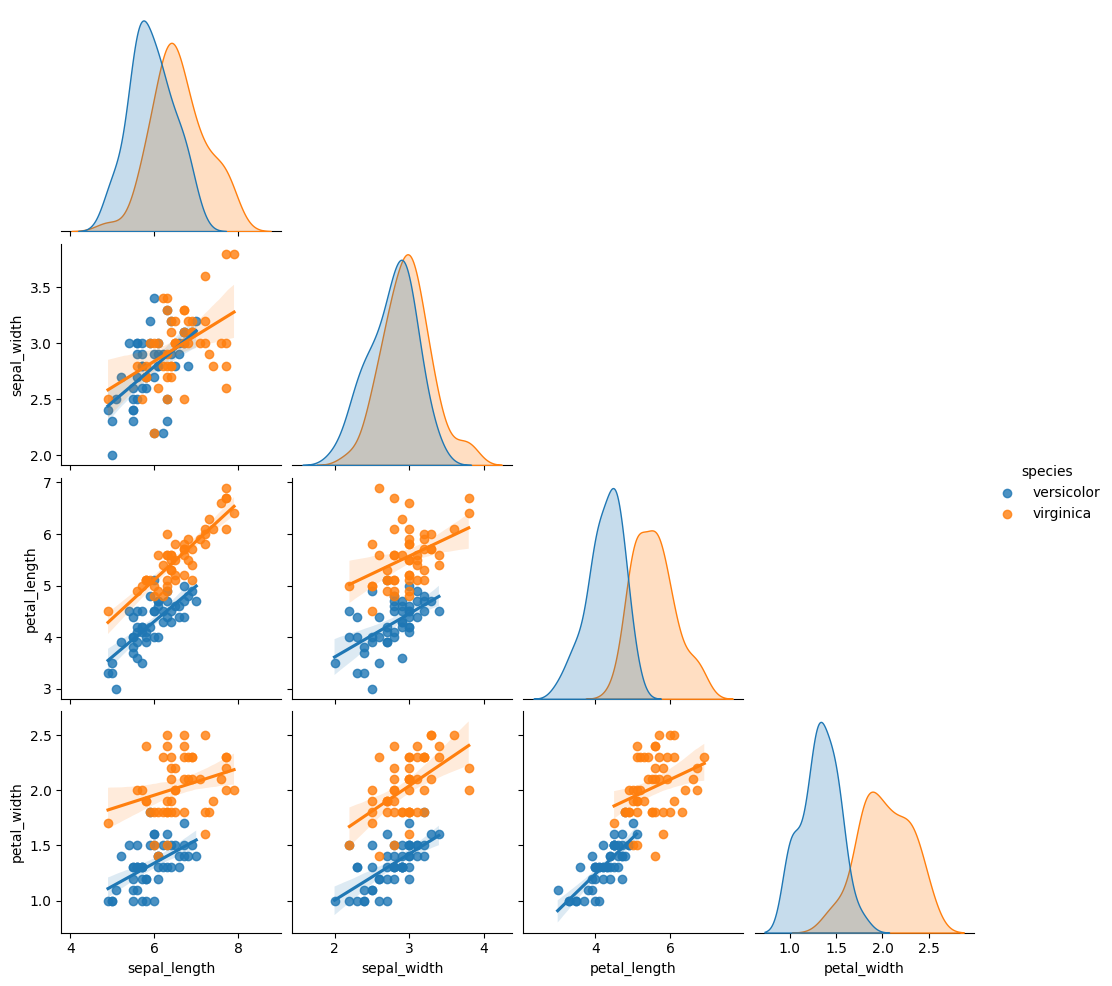

In [9]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Plota os gráficos somente para as espécies Virgínia e Versicolor, embora tenham
    características próximas, é possível ver nos gráficos que existem diferenças,
    embora no caso da análise de sepal_width vs sepal_length, a relação mostre
    a dispersão das classes bastante sobreposta uma da outra.
"""
sns.pairplot(iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')], hue="species", corner=True, kind='reg')

É notório que é possível identificar a espécie da maioria das flores, mas é desafiador para algumas delas. Por que não utilizar um algoritmo de ML para ajudar nesta tarefa?


# **APRENDIZADO DE MÁQUINA - Análise Preditiva**

Agora, a análise preditiva será realizada não por uma pessoa em si, mas com o auxílio de algoritmos de **aprendizado de máquina**. Mais especificamente, o problema será resolvido com o uso do algoritmo **KNN**. As melhores práticas serão realizadas e explicadas.

Utilizaremos a biblioteca scikit-learn, uma biblioteca de aprendizado de máquina de código aberto que suporta aprendizado supervisionado e não supervisionado. Ela também fornece várias ferramentas para ajuste de modelo, pré-processamento de dados, seleção e avaliação de modelo e muitos outros utilitários.

> # **Dados de TREINO e TESTE**

O primeiro passo para realizar uma análise preditiva por meio de um algoritmo de Machine Learning é separar os dados em duas partes. Um a ser **treinado**, então os coeficientes são calculados para o melhor ajuste a esses dados, de acordo com o algoritmo escolhido. A segunda parte é reservada para ser **testada**, assim é possível avaliar a capacidade de generalização do modelo, ou seja, ***avaliar a sua precisão*** para classificar exemplos ainda não vistos.

> A escolha de quais partes dos dados serão usadas como treino e teste é muito importante. Vamos usar **70% como treino** e **30% como teste**.

> ***Scikit-learn*** tem um método muito bom para isso, **train_test_split**; no entanto, toda vez que você executa esse método, ele retorna amostras diferentes, pois o torna aleatório, o que tornaria o mesmo problema impossível de ser replicado. A seleção dos dados pode produzir resultados ligeiramente diferentes para o algoritmo.**

> ***Pandas*** tem uma solução para isso, uma uma divisão aleatória semeada do banco de dados. O método **sample** definido com **random_state=500** o tornaria replicável. Para enxergarem a diferença, executem testes com valores diferentes para random_state e *train_test_split*.

> O resultado final é:

>>* **X_train** e **y_train** **-** para treinamento, dados e alvo, respectivamente
>>* **X_test** **-** dados para prever com o algoritmo
>>* **y_test** **-** alvo para validação do modelo

In [10]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Separa 70% do dataset para treino, utilizando como seed o valor 500,
    o seed serve para tornar esse slice reproduzível.
"""
train = iris.sample(frac=0.7, random_state=500) # random state is a seed value

In [11]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Dropa os index que são train, criando assim os outros 30% que serão test.
"""
test = iris.drop(train.index)

In [12]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Remove a coluna species do dataset, pois é o valor que contém as classes.
"""
X_train = train.drop(labels='species', axis=1)

In [13]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Armazena as classes de train na variável y_train
"""
y_train = train.species

In [14]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Armazena as classes de test na variável X_test
"""
X_test = test.drop(labels='species', axis=1)

In [15]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Armazena as classes de test na variável y_test
"""
y_test = test.species

> **o método train_test_split também possui um método de divisão aleatória semeado, mas não o mesmo, portanto, a mesma semente representa dados diferentes do método de amostra do Pandas.

> Segue a opção de usar o train_test_split: simples, código de uma linha:

>>>**from** sklearn.model_selection **import** train_test_split

>>>X_train,  X_test,  y_train,  y_test = train_test_split ( iris.drop ( 'species' ,axis = 1 ) , iris [ 'species' ] , test_size = 0.3, random_state = 1 )

> A seguir, é apresentada uma amostra das primeiras 5 linhas dos dados do treino.

* Toda vez que o método *train_test_split* é executado, uma *amostra diferente* para teste e treinamento é selecionada, pois trabalha aleatoriamente com os dados. Assim, toda vez que você tiver dados de treino diferentes, o desempenho pode ser diferente. Para minimizar esse problema, são propostas diferentes técnicas (protocolos) para dividir os dados em treinamento/teste; uma das mais conhecidas é a chamada de **validação cruzada**, que será utilizada mais adiante.





In [16]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Imprime as primeiras 5 instâncias do dataset de X_train e y_train.
"""
print(X_train.head(),"\n", y_train.head())

     sepal_length  sepal_width  petal_length  petal_width
7             5.0          3.4           1.5          0.2
126           6.2          2.8           4.8          1.8
136           6.3          3.4           5.6          2.4
133           6.3          2.8           5.1          1.5
66            5.6          3.0           4.5          1.5 
 7          setosa
126     virginica
136     virginica
133     virginica
66     versicolor
Name: species, dtype: object


> A seguir, as dimensões dos dados após a divisão.

In [17]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Mostra o shape do Data Frame de x treino e x teste.
"""
X_train.shape,X_test.shape

((105, 4), (45, 4))

105 linhas e 4 colunas para o treino; 45 linhas (30%) e 4 colunas para o teste.

In [18]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Mostra o shape do Data Frame de y treino e y teste.
"""
y_train.shape,y_test.shape

((105,), (45,))

105 e 45 linhas para treino e teste, respectivamente.

# **KNN - K Nearest Neighbors (Vizinhos mais próximos)***

No reconhecimento de padrões, o algoritmo k-vizinhos mais próximos (k-NN) é um método não paramétrico usado para classificação e regressão.

> Na classificação k-NN, a saída é a atribuição de uma classe. Ao objeto atribuída a classe mais frequente dentre seus k vizinhos mais próximos (k é um inteiro positivo, geralmente pequeno). Se k = 1, então é atribuída ao objeto a classe do vizinho mais próximo.


> ## **Instanciando o Algoritmo KNN**

O Classificador KNN (KNeighborsClassifier) é importado do Scikit-learn.

O **KNeighborsClassifier** possui alguns parâmetros a serem ajustados para melhorar seu desempenho. A princípio, apenas o valor de k (n_neighbors) deve ser definido, enquanto os outros possuem valores definidos como padrão. Posteriormente, pode-se aplicar alguma técnica de ajuste de parâmetros.


In [19]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Importa KNeighborsClassifier
"""
from sklearn.neighbors import KNeighborsClassifier

In [20]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Inicia KNeighborsClassifier com n_neighbors igual a 3, número que será utilizado
    por padrão para realizar as queries do knn.
"""
knn = KNeighborsClassifier(n_neighbors=3)

k (n_neighbors) é configurado com o valor 3

> ## **Treinando o algoritmo KNN**

Nesta etapa o modelo é "treinado". Coloquei entre aspas porque, como sabemos, o kNN não cria uma representação simplificada do conhecimento adquirido. Ele  utiliza o conjunto de dados completo para calcular as distâncias e realizar as previsões.

**Fit** é o método "padrão" utilizado pelo Scikit-Learn para ajustar um classificador aos dados.

In [21]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Chama o método fit para treinar o classificador, no caso do knn a base de dados
    inteira é armazenada, e futuramente será utilizada para classificar novos
    exemplos.
"""
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Antes de visualizar as previsões, é possível estimar a acurácia média para um dado conjunto de dados (teste)  e seus respectivos rótulos.

In [22]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Mostra a acurácia média dado o conjunto de teste e suas labels.
"""
knn.score(X_test,y_test)

0.9555555555555556

> ## **Fazendo previsões com o KNN**

Após a instanciação do KNN, é possível obter os primeiros resultados de previsào para os dados de teste (X_test).

**Predict** é o método para inferir resultados de quaisquer dados compatíveis com os de treino.

In [23]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Realiza a predição de dados dado o conjunto de teste.
"""
results = knn.predict(X_test)
#print(results)
#print(y_test)

Esta é a lista das classes (espécies) previstas para os 45 exemplos do conjunto de teste **X_test**. As previsões devem ser comparadas com os valores reais, representados por **y_test**.

># **Validação**

Técnicas para calcular e melhorar a acurácia e outras métricas de desempenho.

> ## **Matriz de Confusão**

A **Matriz de Confusão** é um método utilizado para verificar como os exemplos de cada classe foram classificados. A partir dela, várias métricas podem ser calculadas, como acurácia, **recall** e **precision**.

In [24]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Utiliza o pandas para criar uma matriz de confusão, é bastante útil
    para entender se existem e quais foram os falsos positivos / positivo negativos
    que o modelo classificou.
"""
print(pd.crosstab(y_test, results, rownames=['Real'], colnames=['Previsto'], margins=True, margins_name='total'))

Previsto    setosa  versicolor  virginica  total
Real                                            
setosa          12           0          0     12
versicolor       0          20          2     22
virginica        0           0         11     11
total           12          20         13     45


A matriz de confusão acima representa os resultados do obtios pelo KNN para a previsão do conjunto de teste.

Para entender melhor a definição de *recall* e *precision*, vamos avaliar os **resultados da classe VIRGINICA**:

* A classe está claramente identificada, pois todas elas foram classificadas corretamente. Isso representa um **recall** de 100%.

* Por outro lado, não se pode dizer que o modelo foi preciso, 100% de **precision**, pois das 13 virginicas preditas, duas delas eram de fato versicolor.

A seguir, essas métricas são calculadas.

> ## **Métricas de Classificação**

A tabela abaixo apresenta as medidas de **precision** e **recall** para cada classe, calculadas com a utilização do módulo **metrics**.

A métrica **f1-score** representa uma média ponderada entre essas duas métricas. Essa é uma ótima métrica por não levar em consideração os verdadeiros negativos que geralmente são irrelevantes para os resultados.

A acuráca mostra o desempenho do algoritmo de forma geral.

In [25]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Importa o metrics do sklearn.
"""
from sklearn import metrics

In [26]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Cálcula as métricas de precision e recall.

Calculando apenas para classe virginica por exemplo,
A métrica Recall avalia qual a proporção de positivos verdadeiros foi corretamente classificada.

A fórmula para isso é: R = TP/ TP + FN, para classe virginica temos 11 TP e 0 FN, então temos que:
R = 11 / 11 + 0 = 11/11 = 1, então temos 100% de recall.

Já a métrica de precision avalia qual a proporção de identificações positivas foram corretamente classificadas.

A fórmula é: TP/TP + FP, no caso da virginica, temos 11 TP e 2 FP, então temos que:
R = 11/11 + 2 = 11/13 0,8461 então temos 84,61% de precision.

f1-score é a média ponderada entre as duas métricas anteriores.

A fórmula da é:
Accuracy = TP + TN/ (TP + TN + FP + FN)

mas é interessante notar que se somarmos o f1-score e dividirmos por 3 também chegaremos na acurácia:

accuracy = (1 + 0.952 + 0.917) / 3 = 2,869 / 3 = 0,9563333333333333 ou só 0.956.
"""
print(metrics.classification_report(y_test,results,target_names=iris.species.unique(), digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        12
  versicolor      1.000     0.909     0.952        22
   virginica      0.846     1.000     0.917        11

    accuracy                          0.956        45
   macro avg      0.949     0.970     0.956        45
weighted avg      0.962     0.956     0.956        45



A acurácia é a mesma apresentada anteriormente pelo método 'score' do KNN, 95,6%.

> ## **Validação Cruzada (Cross Validation)**

Conforme discutido anteriormente, a seleção de dados a serem usados para essas duas partes importantes do aprendizado de máquina supervisionado pode alterar a eficiência do modelo. Em outras palavras, diferentes dados treino podem resultar em diferentes modelos, com diferentes previsões e, consequentemente, diferentes métricas de desempenho.

Isso apenas considerando a seleção dos exemplos que fazem parte do treino e teste, mantendo fixo todos os parâmetros do algoritmo.

Para minimizar esse problema, uma boa solução é usar a **Validação Cruzada**, que divide os dados de treinamento em **n** partições (*folds*) (neste exemplo, n = 5) e repete as etapas de **treino** e **teste** **n** vezes, usando uma dessas partições (folds) como **teste** em cada uma das vezes.

No final, é calculada a média das **n** rodadas para cada métrica.



In [27]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Importa o cross_val_score do pacote sklearn.model_selection
"""
from sklearn.model_selection import cross_val_score

Como visto anteriormente, o desempenho do classificador depende de quais exemplos fazem parte dos conjuntos de treino e teste. Para a seleção realizada com *random_state=500*, a acurácia é de 95,6%.

In [28]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Imprime acurácia do knn com test escolhido manualmente
"""
print(f"Accuracy: {knn.score(X_test,y_test)*100:0.2f} %")

Accuracy: 95.56 %


In [29]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Imprime acurácia do knn com validação 5fold, onde os dados são divididos
    em diferentes partições de treino e teste e avaliado no classsificador.
    Desta maneira, cada exemplo será teste e treino em algum momento.
    É interessante notar que a acurácia varia.
"""
scores = cross_val_score(knn, iris.drop('species',axis=1), iris.species, cv=5, scoring='accuracy')
scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

Com a validação cruzada, o desempenho varia entre 93% e 100%.

O desempenho do classificador é considerado como a média da validação cruzada. Neste caso, 96,7% +/- 2,1%.

In [ ]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Imprime acurácia para o 5fold, nesse caso a média das acurácias obtidas
    no 5fold.
"""
print(f"Accuracy for Cross Validation: {scores.mean()*100}")

Accuracy for Cross Validation: 96.66666666666669


Se você testar outros parâmetros para o classificador, esta é uma métrica de desempenho muito melhor, pois reduz a influência de uma seleção específica dos dados de treino e teste no desempenho do classificador.


># **Otimizando o valor de k (n_neighbors)**

> ## **Definindo um lista de valores para k**

É possível utilizar **GridSearch** para otimização de parâmetros de um classificador.


Inicialmente, o **parâmetro k** do KNN foi configurado com o valor igual a 3.

Agora, esse parâmetro será "otimizado". Para isso, utilizaremos uma lista com os valores de k a serem testados, variando de 1 a 30.

In [31]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- cria uma lista de números em sequência de 1 até 30.
"""
k_list = list(range(1,31))

In [32]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- cria um dicionário armazenando na chave n_neighbors os números criados na célula anterior.
    Estes números serão testados como valores de k.
"""
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])


> ## **Instanciando o objeto GridSearch**

**GridSearch** realiza uma busca exaustiva sobre uma lista de valores previamente especificados para um estimador.

Internamente, são executados os métodos **fit** e **predict**, juntamente com a estratégia de **validação cruzada (cross-validation)**.

In [33]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- importa o GridSearchCV de sklearn.model_selection.
"""
from sklearn.model_selection import GridSearchCV

In [34]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Inicia o GridSearchCV, passando o classificador, os k values, especificando 5fold e especificando acurácia como estratégia para rankear os k.
"""
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

> ## **Executando GridSearch**

In [35]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Chama o método fit passando o dataset.
"""
grid.fit(iris.drop('species', axis=1), iris.species)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

> ## **Vizualizando os resultados**

Vamos checar o desempenho do classificador utilizando todos os parâmetros testados pelo GridSearch.

In [36]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Converte o resultado em um DataFrame e printa as primeiro cinco linhas.
    - Várias métricas com relação ao classificador com os diferentes k estão disponíveis, como acurácia média, acurácia por fold, rank.
"""
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002233,0.000327,0.003105,0.000153,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,19
1,0.002042,0.000026,0.003136,0.000181,2,{'n_neighbors': 2},0.966667,0.933333,0.933333,0.900000,1.0,0.946667,0.033993,26
2,0.002107,0.000095,0.003094,0.000142,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,10
3,0.002298,0.000589,0.003436,0.000562,4,{'n_neighbors': 4},0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,6
4,0.002258,0.000352,0.003176,0.000417,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,6


O método *cv_results_* apresenta diversas métricas obtidas pelo classificador kNN com diferentes valores de k.

In [37]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Lista os atributos disponíveis nos resultados do grid.
"""
for key in grid.cv_results_.keys():
  print(key)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [38]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Cria um dataframe com os melhores resultados (rank 1) e ordena pelo melhor desvio padrão.
"""
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank

,params,mean_test_score,std_test_score,rank_test_score
5,{'n_neighbors': 6},0.98,0.016330,1
6,{'n_neighbors': 7},0.98,0.016330,1
9,{'n_neighbors': 10},0.98,0.026667,1
10,{'n_neighbors': 11},0.98,0.026667,1
11,{'n_neighbors': 12},0.98,0.026667,1


> A melhor acurácia com o menor valor de k é apresentado a seguir.

In [39]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Imprime a melhor acurácia e sua configuração (k=6).
"""
print("O melhor valor de k = {} com {} of accuracy.".format(grid.best_params_,grid.best_score_))

O melhor valor de k = {'n_neighbors': 6} com 0.9800000000000001 of accuracy.


> Ele também apresenta o menor desvio padrão dentre os ranqueados em 1o lugar.

> O ranking depende somente da acurácia, conforme configurado na instanciação do GridSearch.

In [ ]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Exibe o desvio padrão e a acruácia média do melhor classificador
"""
print("O melhor valor de k, rank {}, com k = {}, maior acurácia média obtida com validação cruzada = {} e menor desvio padrão = {}".format(grid_table.at[grid.best_index_,'rank_test_score'],grid_table.at[grid.best_index_,'params'],grid_table.at[grid.best_index_,'mean_test_score'],grid_table.at[grid.best_index_,'std_test_score']))

O melhor valor de k, rank 1, com k = {'n_neighbors': 6}, maior acurácia média obtida com validação cruzada = 0.9800000000000001 e menor desvio padrão = 0.016329931618554516


> A seguir, o melhor **classificador** com sua configuração.

In [ ]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Exibe o melhor classificador e suas configurações
"""
print("O melhor classificador é: {}".format(grid.best_estimator_))

O melhor classificador é: KNeighborsClassifier(n_neighbors=6)


> ## **Gráficos**

A seguir, um gráfico apresentando a variação da acurácia para os diferentes valores de k.

In [41]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Import o matplotlib, uma lib utilizada para visualização de dados.
"""
import matplotlib.pyplot as plt

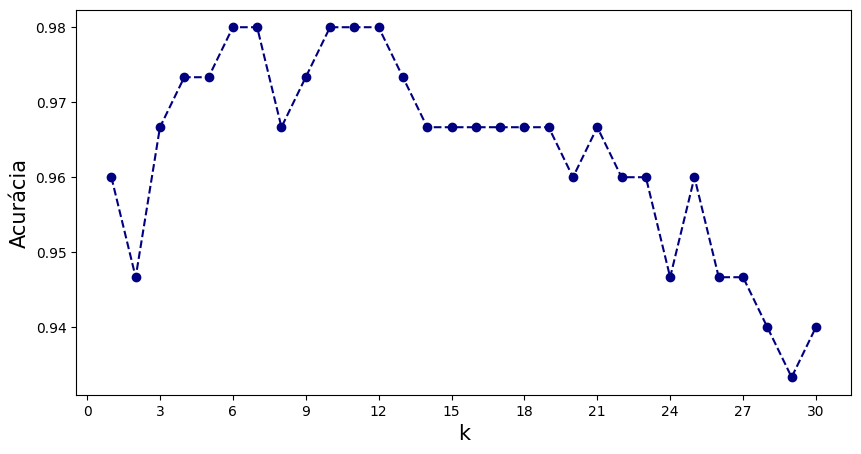

In [42]:
"""
Prática de Aprendizado de Máquina

Descrição do código:
- Cria um gráfico relacionando acurácia com os valores de K, é uma boa forma para
    intuitivamente avaliar o desempenho dos diferentes classificadores.
"""
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('k', fontdict={'fontsize': 15})
plt.ylabel('Acurácia', fontdict={'fontsize': 15})
#plt.title('Acurácia para diferentes valores de k', fontdict={'fontsize': 30})
plt.xticks(range(0,31,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

# **Conclusões**

Outros parâmetros poderiam ter sido ajustados com o **GridSearch**. No entanto, como o conjunto de dados Iris é muito simples, provavelmente não faria muita diferença.

Durante o curso, teremos oportunidade de utilizar outros conjuntos de dados e ajustar parâmetros de outros algoritmos de aprendizado de máquina.

# **Agradecimentos**

Esta aula utilizou parte do conteúdo disponibilizado em:

https://colab.research.google.com/github/teliofm/Minerando/blob/master/Scikit_Learn_KNN_Best_Practices.ipynb


# Resumo e o que aprendi

O KNN é um algoritmo que apesar de não gerar nenhuma representação simplificada de conhecimento, e apenas 'lembrar' o dataset inteiro e tentar realizar novas
previsões baseado na distância entre o dado e seus vizinhos mais próximos no dataset, ainda sim é um ótimo caso de estudo.

Conceitos importantes de métricas também foram interessantes de se estudar, como
o recall e precision, confusion matrix e como estes dados viram a acurácia média.

Outro ponto importante foi a validação cruzada, que é uma boa forma de testar
o desempenho do classificador particionando o dataset de diferentes formas entre
teste e treino.

Também foi possível ver a importância da análise exploratória dos dados, para que possamos entender as características do dataset e até mesmo entender se o classificador em questão é ideal para o caso.

Como vimos, o dataset Iris quando plottado no gráfico de dispersão, apresenta distâncias bem definidas e as classes ficam em grupos bem definidas, quando levamos em consideração certas características, sendo assim era bem esperado que o kNN possuísse uma boa acurácia, dado que usa justamente a distância entre os pontos para realizar predições.